In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

FIRST LOOK

In [65]:
#those are the columns I wanted to use
columnfor = ["Age","Workclass","FWeight","Education", "Education-num", "Marital-Status", "Occupation", "Relationship", "Race", "Sex" ,"Capital-gain", "Capital-loss", "Hour/week", "Native_country" , "Salary"]

In [66]:
df = pd.read_csv("adult.data", names = columnfor)

In [138]:
df_1 = df.copy()

In [139]:
df_1.head()

,Age,Workclass,FWeight,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hour/week,Native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   FWeight         32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hour/week       32561 non-null  int64 
 13  Native_country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [140]:
df_1.shape[0]

32561

VISUALIZATION FOR EDA

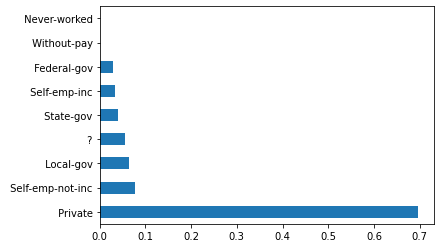

In [38]:
df_1.Workclass.value_counts(normalize=True)
df_1.Workclass.value_counts(normalize=True).plot.barh()
plt.show()
#sth is wrong. why is there a column named '?' ?

In [141]:
#purging rows containing "?"
for cols in df_1.columns: 
    df_1 = df_1[df_1[cols] != " ?"]

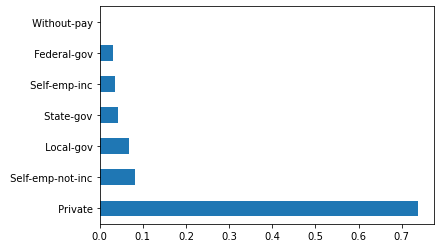

In [40]:
df_1.Workclass.value_counts(normalize=True)
df_1.Workclass.value_counts(normalize=True).plot.barh()
plt.show()

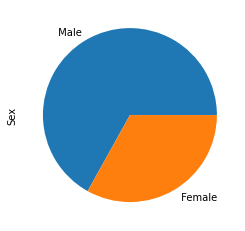

In [41]:
df.Sex.value_counts(normalize=True)
df.Sex.value_counts(normalize=True).plot.pie()
plt.show()

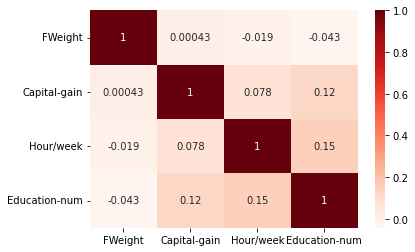

In [42]:
df[['FWeight','Capital-gain','Hour/week','Education-num']].corr()
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(df[['FWeight','Capital-gain','Hour/week','Education-num']].corr(), annot=True, cmap = 'Reds')
plt.show()

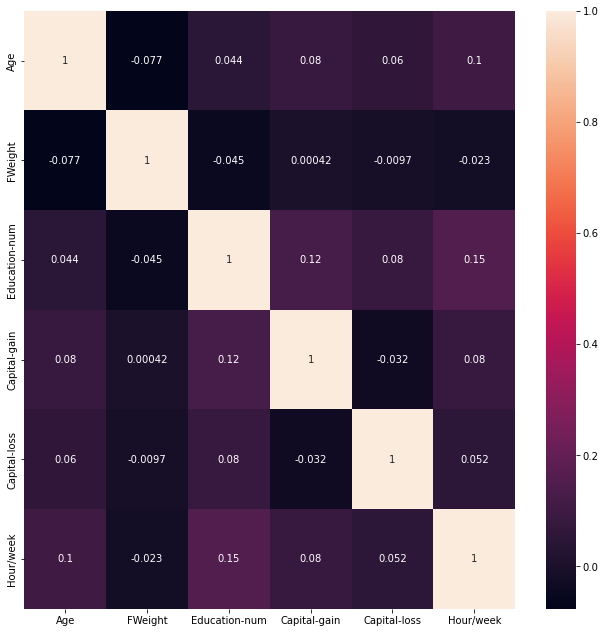

In [46]:
f, ax = plt.subplots(figsize = (11,11))
sns.heatmap(df_1.corr(), annot=True)
plt.show()
# it shows there are week correlations between numerical values

<AxesSubplot:xlabel='Workclass', ylabel='Salary'>

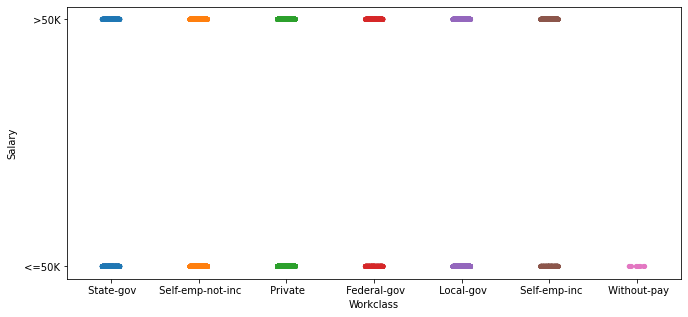

In [58]:
f, ax = plt.subplots(figsize = (11,5))
sns.stripplot(x="Workclass", y="Salary", data=df_1)

ARRANGING TARGET COLUMN

In [14]:
#The result isn't as I expected. Something is wrong...
df_1.loc[df_1["Salary"] == ">=50K"]

,Age,Workclass,FWeight,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hour/week,Native_country,Salary


In [15]:
# it shows that there is one space before statement of the first row in the first column
df_1["Salary"].tolist()[0]

' <=50K'

In [53]:
# now i have the format that I had wanted
# now i saw some "?" values on some rows. i will vanish those rows
df_1.loc[df_1["Salary"] == " >50K"]

,Age,Workclass,FWeight,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hour/week,Native_country,Salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [56]:
print((df_1.loc[df_1["Salary"] == " >50K"].shape[0] + df_1.loc[df_1["Salary"] == " <=50K"].shape[0]) == df_1.shape[0])

True


In [105]:
df_1 = df.copy()

In [96]:
df_1.dtypes

Age                int64
Workclass         object
FWeight            int64
Education         object
Education-num      int64
Marital-Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hour/week          int64
Native_country    object
Salary            object
dtype: object

In [90]:
# it doesnt work unless i get rid of categorical columns. applicable only for numerics
normalized_df=(df_1-df_1.min())/(df_1.max()-df_1.min())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [142]:
#numerical columns are normalized. Its done here for shorten calculation intensity. If it is processed at the end of dummy
# i would need to specify columns manually to prevent addition of dummy columns into normalization process.
df_n = pd.DataFrame()
for col in df_1:
    if df_1.dtypes[col] == ("int64") or df_1.dtypes[col] == ("int32"):
        print(f'{col}')
        df_n=(df_1[col]-df_1[col].min())/(df_1[col].max()-df_1[col].min())
        del df_1[col]
        df_1 = pd.concat([df_1,df_n],axis=1)      

Age
FWeight
Education-num
Capital-gain
Capital-loss
Hour/week


In [143]:
df_1

,Workclass,Education,Marital-Status,Occupation,Relationship,Race,Sex,Native_country,Salary,Age,FWeight,Education-num,Capital-gain,Capital-loss,Hour/week
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,0.301370,0.043338,0.800000,0.021740,0.0,0.397959
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0.452055,0.047277,0.800000,0.000000,0.0,0.122449
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0.287671,0.137244,0.533333,0.000000,0.0,0.397959
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0.493151,0.150212,0.400000,0.000000,0.0,0.397959
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,0.150685,0.220703,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,0.136986,0.165563,0.733333,0.000000,0.0,0.377551
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,0.315068,0.095589,0.533333,0.000000,0.0,0.397959
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,0.561644,0.093914,0.533333,0.000000,0.0,0.397959
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,0.068493,0.127620,0.533333,0.000000,0.0,0.193878


In [144]:
# transform salary columns to be a suitable target for ml/ann
df_1.loc[df_1["Salary"] == " >50K", "Salary"] = 1
df_1.loc[df_1["Salary"] == " <=50K", "Salary"] = 0
# to prevent dummy trap
df_1.loc[df_1["Sex"] == " Male", "Sex"] = 1
df_1.loc[df_1["Sex"] == " Female", "Sex"] = 0
# changing the type of data for more appropriate approach to data
df_1 = df_1.astype({"Salary" : int})
df_1 = df_1.astype({"Sex" : int})

In [70]:
df_1.sample(15)

,Age,Workclass,FWeight,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hour/week,Native_country,Salary
11237,30,Private,185177,11th,7,Never-married,Handlers-cleaners,Own-child,White,1,0,0,49,United-States,0
16428,35,Private,105138,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,1,0,0,40,United-States,1
19114,73,Private,284680,HS-grad,9,Divorced,Other-service,Not-in-family,White,0,0,0,20,United-States,0
10346,22,Private,239612,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0
20665,25,Private,130302,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,0
16649,39,Local-gov,132879,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,1887,40,United-States,1
5163,27,Private,133937,Masters,14,Never-married,Sales,Own-child,White,1,0,0,40,United-States,0
17265,44,Private,379919,Assoc-acdm,12,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,60,United-States,1
3989,22,Private,191324,Some-college,10,Never-married,Protective-serv,Own-child,White,1,0,0,25,United-States,0
17270,24,Private,197387,HS-grad,9,Never-married,Other-service,Own-child,White,1,0,0,40,Mexico,0


In [145]:
# fixing the jumps of index
df_1.reset_index(inplace=True)

In [146]:
# not good, it also adds ex-index as a new column.
df_1

,index,Workclass,Education,Marital-Status,Occupation,Relationship,Race,Sex,Native_country,Salary,Age,FWeight,Education-num,Capital-gain,Capital-loss,Hour/week
0,0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,United-States,0,0.301370,0.043338,0.800000,0.021740,0.0,0.397959
1,1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,United-States,0,0.452055,0.047277,0.800000,0.000000,0.0,0.122449
2,2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,United-States,0,0.287671,0.137244,0.533333,0.000000,0.0,0.397959
3,3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,United-States,0,0.493151,0.150212,0.400000,0.000000,0.0,0.397959
4,4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,Cuba,0,0.150685,0.220703,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,0,United-States,0,0.136986,0.165563,0.733333,0.000000,0.0,0.377551
30158,32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,1,United-States,1,0.315068,0.095589,0.533333,0.000000,0.0,0.397959
30159,32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,0,United-States,0,0.561644,0.093914,0.533333,0.000000,0.0,0.397959
30160,32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,1,United-States,0,0.068493,0.127620,0.533333,0.000000,0.0,0.193878


In [147]:
# okay then we get rid of index column manually
cols = list(df_1.columns.values)
cols.pop(cols.index('index'))
df_1 = df_1[cols]

In [148]:
#creating dummy columns
dummy = pd.DataFrame()
for col in df_1.columns:
    if df_1.dtypes[col] == "O":
        print(f"Col = {col}")
        dummy = pd.get_dummies(df_1[col])
        del df_1[col]
        df_1 = pd.concat([df_1,dummy],axis=1)

Col = Workclass
Col = Education
Col = Marital-Status
Col = Occupation
Col = Relationship
Col = Race
Col = Native_country


In [149]:
df_1

,Sex,Salary,Age,FWeight,Education-num,Capital-gain,Capital-loss,Hour/week,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,1,0,0.301370,0.043338,0.800000,0.021740,0.0,0.397959,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0.452055,0.047277,0.800000,0.000000,0.0,0.122449,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0.287671,0.137244,0.533333,0.000000,0.0,0.397959,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0.493151,0.150212,0.400000,0.000000,0.0,0.397959,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0.150685,0.220703,0.800000,0.000000,0.0,0.397959,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0,0,0.136986,0.165563,0.733333,0.000000,0.0,0.377551,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,1,1,0.315068,0.095589,0.533333,0.000000,0.0,0.397959,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,0,0,0.561644,0.093914,0.533333,0.000000,0.0,0.397959,0,0,...,0,0,0,0,0,0,0,1,0,0
30160,1,0,0.068493,0.127620,0.533333,0.000000,0.0,0.193878,0,0,...,0,0,0,0,0,0,0,1,0,0


In [150]:
#putting salary (target) at the end of columns
cols = list(df_1.columns.values)
cols.pop(cols.index('Salary'))
df_1 = df_1[cols+['Salary']]

In [233]:
df_1.columns.values

array(['Age', 'FWeight', 'Education-num', 'Sex', 'Capital-gain',
       'Capital-loss', 'Hour/week', ' ?', ' ?', ' ?', ' Federal-gov',
       ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay', ' 10th',
       ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',
       ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' ?', ' ?', ' ?', ' Adm-clerical',
       ' Armed-Forces', ' Craft-repair', ' Exec-managerial',
       ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct',
       ' Other-service', ' Priv-house-serv', ' Prof-specialty',
       ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving',
       ' Husband', ' Not-in-family', ' Other-relative', ' Own-chi

In [151]:
# finalized data
df_1

,Sex,Age,FWeight,Education-num,Capital-gain,Capital-loss,Hour/week,Federal-gov,Local-gov,Private,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Salary
0,1,0.301370,0.043338,0.800000,0.021740,0.0,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.452055,0.047277,0.800000,0.000000,0.0,0.122449,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0.287671,0.137244,0.533333,0.000000,0.0,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0.493151,0.150212,0.400000,0.000000,0.0,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0.150685,0.220703,0.800000,0.000000,0.0,0.397959,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0,0.136986,0.165563,0.733333,0.000000,0.0,0.377551,0,0,1,...,0,0,0,0,0,0,1,0,0,0
30158,1,0.315068,0.095589,0.533333,0.000000,0.0,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,1
30159,0,0.561644,0.093914,0.533333,0.000000,0.0,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0
30160,1,0.068493,0.127620,0.533333,0.000000,0.0,0.193878,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [125]:
df_1.to_csv("cl_v1.csv")

In [77]:
df_normalized = df_1.copy()

In [82]:
df_normalized.dtypes

index               int64
Age                 int64
FWeight             int64
Education-num       int64
Sex                 int32
                    ...  
 Trinadad&Tobago    uint8
 United-States      uint8
 Vietnam            uint8
 Yugoslavia         uint8
Salary              int32
Length: 105, dtype: object

In [81]:
# I realized if i wanted to normalize numerical columns, i also have to add dummy columns along with desired columns.
# thats why i am moving this process at the top before dummy.
for col in df_1.columns:
    if df_1.dtypes[col] == "int32" or "int64" :
        print(f"Col = {col}")
#        dummy = pd.get_dummies(df_1[col])
#        del df_1[col]
#        df_1 = pd.concat([df_1,dummy],axis=1)

Col = index
Col = Age
Col = FWeight
Col = Education-num
Col = Sex
Col = Capital-gain
Col = Capital-loss
Col = Hour/week
Col =  Federal-gov
Col =  Local-gov
Col =  Private
Col =  Self-emp-inc
Col =  Self-emp-not-inc
Col =  State-gov
Col =  Without-pay
Col =  10th
Col =  11th
Col =  12th
Col =  1st-4th
Col =  5th-6th
Col =  7th-8th
Col =  9th
Col =  Assoc-acdm
Col =  Assoc-voc
Col =  Bachelors
Col =  Doctorate
Col =  HS-grad
Col =  Masters
Col =  Preschool
Col =  Prof-school
Col =  Some-college
Col =  Divorced
Col =  Married-AF-spouse
Col =  Married-civ-spouse
Col =  Married-spouse-absent
Col =  Never-married
Col =  Separated
Col =  Widowed
Col =  Adm-clerical
Col =  Armed-Forces
Col =  Craft-repair
Col =  Exec-managerial
Col =  Farming-fishing
Col =  Handlers-cleaners
Col =  Machine-op-inspct
Col =  Other-service
Col =  Priv-house-serv
Col =  Prof-specialty
Col =  Protective-serv
Col =  Sales
Col =  Tech-support
Col =  Transport-moving
Col =  Husband
Col =  Not-in-family
Col =  Other-re

In [152]:
df_sp = df_1.copy()

In [153]:
df_sp.shape[0]

30162

In [154]:
df_75 = df_sp.sample(frac = 0.75)
df_25 = df_sp.drop(df_75.index)

In [155]:
df_75

,Sex,Age,FWeight,Education-num,Capital-gain,Capital-loss,Hour/week,Federal-gov,Local-gov,Private,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Salary
16213,0,0.054795,0.129254,0.666667,0.0,0.0,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5236,1,0.328767,0.009297,0.600000,0.0,0.0,0.459184,0,0,1,...,0,0,0,0,0,0,1,0,0,1
13265,0,0.260274,0.020349,0.600000,0.0,0.0,0.193878,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2504,0,0.506849,0.056387,0.533333,0.0,0.0,0.193878,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10659,1,0.342466,0.046496,0.333333,0.0,0.0,0.346939,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,1,0.273973,0.176201,0.533333,0.0,0.0,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0
26937,1,0.150685,0.013616,0.666667,0.0,0.0,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2703,0,0.000000,0.114418,0.400000,0.0,0.0,0.153061,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28752,1,0.602740,0.062927,0.533333,0.0,0.0,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [156]:
df_25

,Sex,Age,FWeight,Education-num,Capital-gain,Capital-loss,Hour/week,Federal-gov,Local-gov,Private,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Salary
13,1,0.205479,0.130019,0.733333,0.000000,0.000000,0.500000,0,0,1,...,0,0,0,0,0,0,1,0,0,0
18,0,0.356164,0.189271,0.866667,0.000000,0.000000,0.448980,0,0,0,...,0,0,0,0,0,0,1,0,0,1
22,1,0.356164,0.070206,0.400000,0.000000,0.468779,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0
24,1,0.534247,0.138063,0.800000,0.000000,0.000000,0.397959,0,1,0,...,0,0,0,0,0,0,1,0,0,1
25,1,0.027397,0.105052,0.533333,0.000000,0.000000,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30135,0,0.164384,0.076283,0.533333,0.000000,0.000000,0.346939,0,0,1,...,0,0,0,0,0,0,1,0,0,0
30144,0,0.383562,0.071675,0.733333,0.000000,0.000000,0.479592,0,1,0,...,0,0,0,0,0,0,1,0,0,0
30145,0,0.191781,0.126373,0.866667,0.000000,0.000000,0.295918,0,0,1,...,0,0,0,0,0,0,1,0,0,0
30150,0,0.356164,0.164566,0.600000,0.000000,0.000000,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [136]:
df_75.shape[0] + df_25.shape[0]

7540

In [157]:
df_25.to_csv("cl_25_v1.csv")
df_75.to_csv("cl_75_v1.csv")